![IMAGEN SEGURO MÉDICO](../utils/health-insurance-paperwork-money.jpg)

# PROYECTO ML - COSTO MÉDICO PERSONAL FACTURADO POR EL SEGURO MÉDICO

## 1. INTRODUCCIÓN Y OBJETIVO

El presente proyecto tiene como objetivo predecir los costos médicos según determinadas características de cada persona. 

Dichas predicciones serán realizadas aplicando Machine Learning, y específicamente modelos de Regresión. Anteriormente haré un EDA para analizar previamente el dataset.

Lo que se busca predecir es el costo médico, es decir, los cargos económicos que tendría una persona según algunos factores como la edad, el sexo, el índice de masa corporal (imc), cantidad de hijos, si es fumadora o no, etc.

En cuanto al EDA, vamos a analizar mediante funciones y gráficos la cardinalidad de las variables, observar si hay correlaciones entre las mismas, o la relación es nula, cómo se distribuyen los datos en cada característica, si hay asimetría o distribución normal, entre otras cosas. 

Posteriormente, en base al análisis realizado, haremos la limpieza correspondiente según haya valores nulos, traducciones, duplicados, etc.

Y por último, en la etapa de Machine Learning, en primer lugar, realizaremos las transformaciones necesarias a las variables (Feature Engineering) como ser: convertir las variables categóricas en numéricas, utilizando distintos métodos como mapeos, LabelEncoder; aplicaremos el logaritmo a las características que correspondan para obtener una distribución normal o escalado mediante Standard Scaler con el fin de tener todas las variables en una misma escala, para lograr un mejor rendimiento del modelo.

Posteriormente, analizaremos cuál de los modelos de Regresión generaliza mejor, utilizando 'Cross Validation' y también 'GridSearch', para encontrar los mejores hiperparámetros respecto a dichos modelos. 

Por último, haremos las predicciones correspondientes en base a los mejores modelos y utilizaremos las métricas que se utilizan en estos problemas de regresión como por ejemplo, el Coeficiente de Determinación (R2), la Raíz del Error Cuadrático Medio (RMSE), para conocer el rendimiento del modelo y cómo éste generaliza los nuevos datos.

### 1.1. DESCRIPCIÓN DATASET Y COLUMNAS

El DataFrame contiene 1338 filas y 7 columnas, sin valores nulos.

**COLUMNAS**
- **`edad`**: 
  * Edad del beneficiario principal.
  * Columna numérica. Tipo: Int64. 
  * La edad va desde los 18 años hasta los 64.

- **`sexo`**: 
  * Género de la persona, femenino o masculino.
  * Columna categórica. Tipo: Object.
  * Se divide en femenino y masculino.

- **`imc`**: 
  * Índice de masa corporal (kg/m^2) utilizando la relación entre altura y peso, idealmente 18,5 a 24,9. 
  * Columna numérica. Tipo: Float64.


- **`hijos`**: 
  * Número de hijos del beneficiario.
  * Columna numérica. Tipo: Int64.
  
- **`fumador`**: 
  * Si la persona es fumadora o no. 
  * Columna categórica. Tipo: Object.

- **`región`**: 
  * Zona residencial del beneficiario en EE. UU., noreste, sureste, suroeste, noroeste.
  * Columna categórica. Tipo: Object.

- **`cargos`**: 
  * Costos médicos individuales facturados.
  * Columna numérica. Tipo: Float64.

## 2. IMPORTACIÓN LIBRERÍAS

In [35]:
# Tratamiento de datos
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import pickle

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Correlaciones - Prueba de hipótesis
from scipy.stats import pearsonr, ttest_ind, f_oneway

# Preprocesamiento de datos
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.utils import resample

# Modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error, make_scorer

from sklearn.model_selection import GridSearchCV

## 3. DATA

In [2]:
df = pd.read_csv('../data/raw/insurance.csv')

## 4. PRIMERA EXPLORACIÓN DE DATOS 

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.isna().sum()/len(df)*100

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.describe(include=object)

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [10]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


## 5. LIMPIEZA

### 5.1. TRADUCCIONES 

Los nombres de las columnas se encuentran en inglés, por lo que realizaré la traducción al español de las etiquetas para una uniformidad en el lenguaje del notebook. 

In [6]:
nombres_columnas = ['edad', 'sexo', 'imc', 'hijos', 'fumador', 'region', 'costo']
df.columns = nombres_columnas

### 5.2. ELIMINACIÓN DUPLICADOS

In [7]:
df[df.duplicated()]

,edad,sexo,imc,hijos,fumador,region,costo
581,19,male,30.59,0,no,northwest,1639.5631


Al observar que existe un duplicado en la fila 581, lo eliminamos: 

In [8]:
df = df.drop_duplicates()

### 5.3. GUARDAR DATAFRAME LUEGO DE LA LIMPIEZA

In [9]:
df.to_csv('../data/processed/df_limpio.csv')

## 6. EDA - ANÁLISIS EXPLORATORIO DE DATOS

### 6.0. ANÁLISIS DE CARDINALIDAD

In [2]:
df = pd.read_csv('../data/processed/df_limpio.csv', index_col=[0])

En primer lugar, ejecutaremos una función para ver la cardinalidad del DataFrame podemos ver lo que he descripto en el título *'1.Introducción y Objetivo'*, en cuanto al tipo de dato de cada columna, tipo de varibale, etc.

In [3]:
def calcular_cardinalidad(df):
    cardinalidad = pd.DataFrame(index=df.columns)

    cardinalidad['valores_unicos'] = [df[col].nunique() for col in df.columns]
    cardinalidad['porcentaje_cardinalidad'] = round(cardinalidad['valores_unicos'] / len(df) * 100, 2)
    cardinalidad['tipo_de_dato'] = df.dtypes
    cardinalidad['tipo_de_variable'] = ['Categórica' if df[col].dtype == 'object' else 'Numérica' for col in df.columns]

    return cardinalidad

In [12]:
calcular_cardinalidad(df)

,valores_unicos,porcentaje_cardinalidad,tipo_de_dato,tipo_de_variable
edad,47,3.52,int64,Numérica
sexo,2,0.15,object,Categórica
imc,548,40.99,float64,Numérica
hijos,6,0.45,int64,Numérica
fumador,2,0.15,object,Categórica
region,4,0.30,object,Categórica
costo,1337,100.00,float64,Numérica


### 6.1. ANÁLISIS UNIVARIANTE 

#### 6.1.1. Distribución columnas numéricas

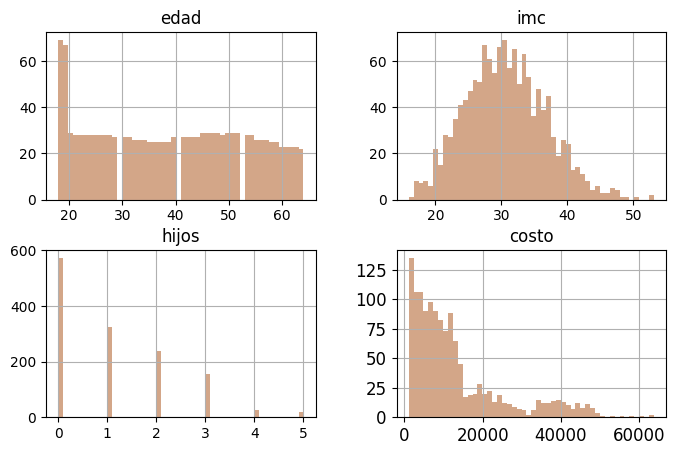

In [12]:
# Define el color personalizado
color = '#D3A688'

# Crea el histograma con estilo personalizado
df.hist(bins=50, figsize=(8,5), color=color)

# Personaliza el tamaño de las etiquetas de los ejes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Guardar el gráfico como imagen 
plt.savefig('../utils/histograma_columnas_numercias.png')

# Muestra el histograma
plt.show()

Podemos observar que la única columna que tiene una distribución normal es 'imc', mientras que a las otras, habrá que aplicarle ciertas transformaciones para un mejor rendimiento de los modelos.

#### 6.1.1. Distribución columna 'edad'

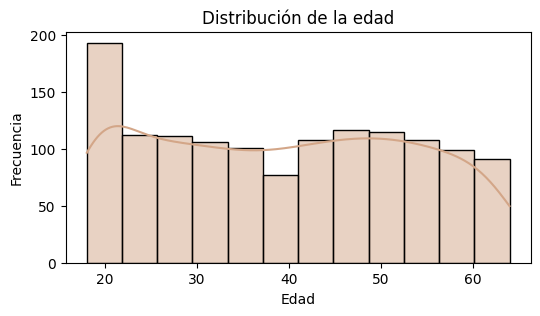

In [7]:
# Establece el tamaño de la figura
plt.figure(figsize=(6,3))

# Título del gráfico
plt.title("Distribución de la edad")

# Utiliza Seaborn para crear el histograma con el color personalizado
ax = sns.histplot(df["edad"], color='#D3A688', kde=True)

# Ajustes estéticos
plt.xlabel("Edad")
plt.ylabel("Frecuencia")

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_edad.png')

# Muestra el gráfico
plt.show()


> ##### **CONCLUSIONES** 
En la variable `'edad'` el rango de edades se encuentra entre los 18 y 64 años.

Al no tener una distribución normal, le haremos una transformación logarítmica para logar una distribución mas simétrica y escalado, para que se encuentre en la misma escala que otras variables a la hora de entrenar los modelos. 

#### 6.1.2. Distribución columna 'sexo'

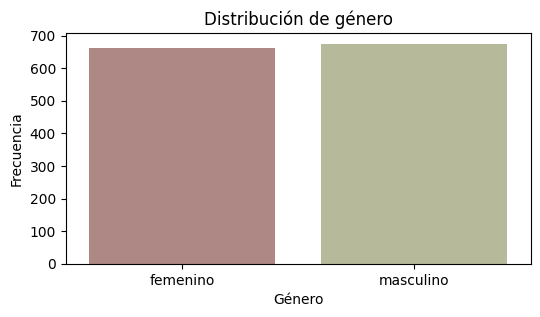

In [8]:
# Crear un nuevo DataFrame con la columna traducida
df_sexo = pd.DataFrame()
df_sexo['sexo_traducido'] = df['sexo'].map({'female': 'femenino', 'male': 'masculino'})

# Establecer los colores
colores = {'femenino': '#B5837D', 'masculino': '#BABF95'}

# Crear el gráfico de barras
plt.figure(figsize=(6,3))
sns.countplot(x='sexo_traducido', data=df_sexo, palette=colores)

# Ajustes estéticos
plt.title('Distribución de género')
plt.xlabel('Género')
plt.ylabel('Frecuencia')

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_sexo.png')

# Mostrar el gráfico
plt.show()



In [14]:
df['sexo'].value_counts()

sexo
male      675
female    662
Name: count, dtype: int64

> ##### **CONCLUSIONES**

Podemos ver que la variable `'sexo'` tiene los datos balanceados. Con la siguiente distribución: 
- Masculino: 675
- Femenino: 662

#### 6.1.3. Distribución columna 'imc'

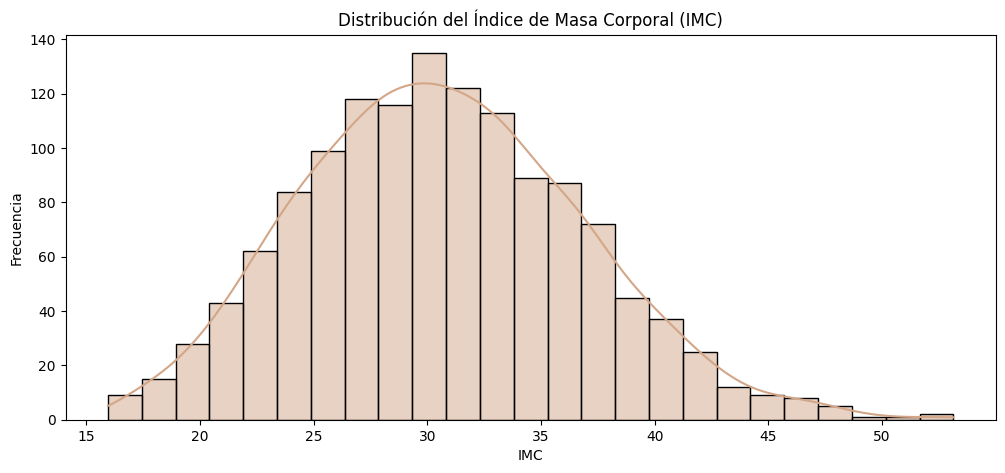

In [27]:
# Establece el tamaño de la figura
plt.figure(figsize=(12, 5))

# Título del gráfico
plt.title("Distribución del Índice de Masa Corporal (IMC)")

# Utiliza Seaborn para crear el histograma con el color personalizado
ax = sns.histplot(df["imc"], color='#D3A688', kde=True)

# Ajustes estéticos
plt.xlabel("IMC")
plt.ylabel("Frecuencia")

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_imc.png')

# Muestra el gráfico
plt.show()


> ##### **CONCLUSIONES** 

La distribución de la columna `'imc'` tiene una distribución normal por lo que no le aplicaremos transformaciones logarítmicas. 

Simplemente haremos un escalado de los datos, para que se encuentre en la misma escala que las demás variables a la hora de entrenar los modelos para obtener mejores resultados. 

#### 6.1.4. Distribución columna 'hijos'

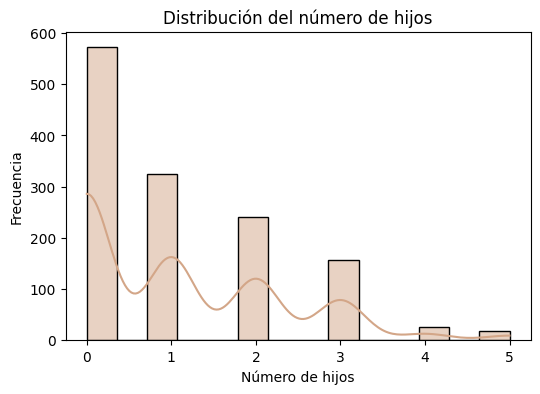

In [19]:
# Establecer el tamaño de la figura
plt.figure(figsize=(6,4))

# Título del gráfico
plt.title("Distribución del número de hijos")

# Utilizar Seaborn para crear el histograma con el color personalizado
ax = sns.histplot(df["hijos"], color='#D3A688', kde=True)

# Ajustes estéticos
plt.xlabel("Número de hijos")
plt.ylabel("Frecuencia")

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_hijos.png')

# Mostrar el gráfico
plt.show()


> ##### **CONCLUSIONES** 

A la presente columna le aplicaremos un escalado para que esté en sintonía con las demas variables.

#### 6.1.5. Distribución columna 'fumador'

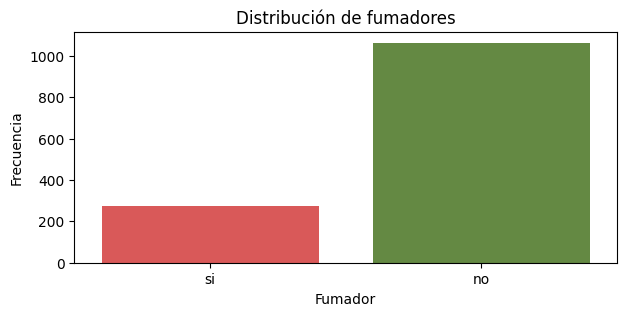

In [21]:
# Crear un nuevo DataFrame con la columna traducida
df_fumador = pd.DataFrame()
df_fumador['fumador_traducido'] = df['fumador'].map({'yes': 'si', 'no': 'no'})

# Establecer los colores
colores = {'si': '#EE4444', 'no': '#639438'}

# Crear el gráfico de barras
plt.figure(figsize=(7,3))
sns.countplot(x='fumador_traducido', data=df_fumador, palette=colores)

# Ajustes estéticos
plt.title('Distribución de fumadores')
plt.xlabel('Fumador')
plt.ylabel('Frecuencia')

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_fumador.png')

# Mostrar el gráfico
plt.show()


> ##### **CONCLUSIONES** 

A la columna `'fumador'` le aplicaremos un mapeo para transformar los valores a binarios, es decir, reemplazaremos "si" por 1 (positivo) y "no" por 0 (negativo).

#### 6.1.6. Distribución columna 'region'

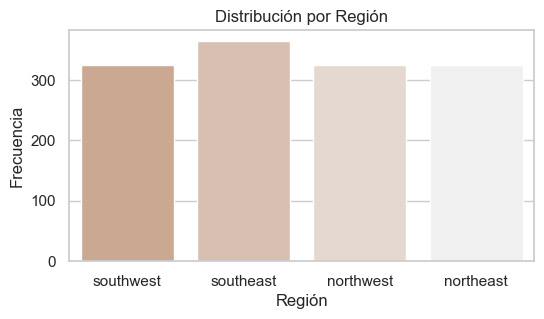

In [59]:
color = '#D3A688'
paleta_colores = sns.light_palette(color, n_colors=4, reverse=True)

plt.figure(figsize=(6,3))
sns.countplot(x='region', data=df, palette=paleta_colores)

plt.title('Distribución por Región')
plt.xlabel('Región')
plt.ylabel('Frecuencia')

plt.show()


> ##### **CONCLUSIONES** 

La columna `'región'` contiene 4 valores. Establece la región en la que viven los beneficiarios del seguro médico. 


#### 6.1.7. Distribución columna 'costo'

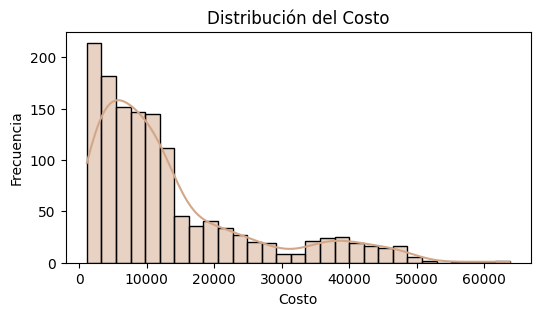

In [5]:
# Establecer el tamaño de la figura
plt.figure(figsize=(6, 3))

# Título del gráfico
plt.title("Distribución del Costo")

# Utilizar Seaborn para crear el histograma con el color personalizado
ax = sns.histplot(df["costo"], color='#D3A688', kde=True)

# Ajustes estéticos
plt.xlabel("Costo")
plt.ylabel("Frecuencia")

# Guardar el gráfico como imagen 
plt.savefig('../utils/distribución_costo.png')

# Mostrar el gráfico
plt.show()


> ##### **CONCLUSIONES** 

La columna `'costo'` es nuestra target o variable objetivo, aquellos datos que se intentan predecir con los modelos de ML. 

Como puede observarse, tiene una distribución asimétrica positiva, es decir, tiene un sesgo hacia la derecha, lo cual significa que la mayoría de los datos están concentrados hacia el lado izquierdo del gráfico, mientras que hay algunos valores muy altos que empujan la media hacia la derecha.

Por lo tanto, deberemos aplicarle logaritmo y escalar los datos. 

- **LOGARITMO**: para reducir la asimetría en su distribución. Al transformar los valores con una función logarítmica, podemos mitigar el efecto de los valores atípicos y hacer que la distribución se parezca más a una distribución normal, lo que puede mejorar la eficacia de algunos modelos que asumen normalidad en los datos.

- **ESCALADO**: para garantizar que todas las características/variables estén en la misma escala, lo que ayuda a los modelos a converger más rápidamente durante el entrenamiento y a evitar que ciertas características dominen sobre otras debido a su magnitud.

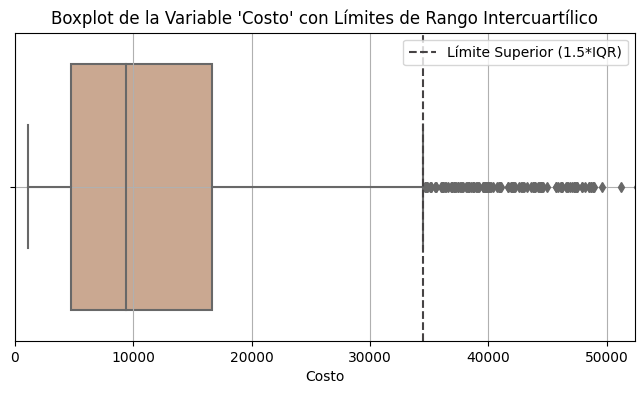

In [4]:
# Calcular el rango intercuartílico
Q1 = df["costo"].quantile(0.25)
Q3 = df["costo"].quantile(0.75)
IQR = Q3 - Q1

# Establecer los límites para los outliers
limite_superior = Q3 + 1.5 * IQR

# Establecer el tamaño de la figura
plt.figure(figsize=(8,4))

# Crear el boxplot
sns.boxplot(x=df["costo"], color='#D3A688')

# Dibujar líneas para los límites del rango intercuartílico
plt.axvline(x=limite_superior, linestyle='--', color='#464344', label='Límite Superior (1.5*IQR)')

# Ajustar límites del eje x
plt.xlim(left=0, right=limite_superior + 1.5 * IQR)

# Ajustes estéticos
plt.title("Boxplot de la Variable 'Costo' con Límites de Rango Intercuartílico")
plt.xlabel("Costo")
plt.legend()
plt.grid(True)

# Guardar el gráfico como imagen 
plt.savefig('../utils/boxplot_costo.png')

# Mostrar el gráfico
plt.show()


> ##### **CONCLUSIONES:**

En este gráfico de caja podemos observar mejor que la variable 'costo' tiene una gran cantidad de outliers, razón por la cual, la distribución está sesgada hacia la derecha. 

### 6.2. ANÁLISIS BIVARIANTE

#### 6.2.1. Relación 'costo' según 'edad' de los beneficiarios


A continuación realizaremos un gráfico de dispersión, para averiguar si existe una relación entre la edad de los beneficiarios y el costo médico. 

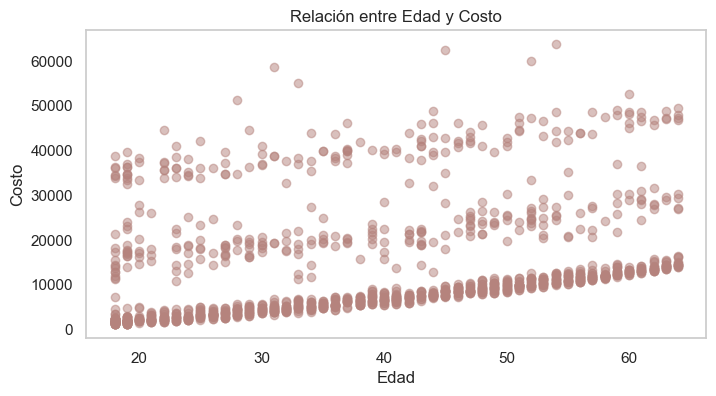

In [39]:
plt.figure(figsize=(8,4))
plt.scatter(df['edad'], df['costo'], color='#B5837D', alpha=0.5)
plt.title('Relación entre Edad y Costo')
plt.xlabel('Edad')
plt.ylabel('Costo')
plt.grid(False)
plt.show()

Parece que hay una **tendencia positiva** en el gráfico de dispersión, lo que indica que, en general, a medida que la edad aumenta, el costo tiende a aumentar también.

------------------------

A continuación, se calculará el **Coeficiente de Correlación de Pearson**, que es una medida estadística que evalúa la relación lineal entre dos variables cuantitativas.

**HIPÓTESIS**

- *Hipótesis nula (H0):* No hay correlación entre la edad y el costo médico.

- *Hipótesis alternativa (H1):* Existe una correlación entre la edad y el costo médico.

In [47]:
correlacion = df['edad'].corr(df['costo'])

nivel_significancia = 0.05

print("\nCoeficiente de correlación de Pearson entre edad y costo:", correlacion)

if abs(correlacion) > nivel_significancia:
    print("Se rechaza la hipótesis nula. Existe una correlación significativa entre la edad y el costo médico.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que existe una correlación significativa entre la edad y el costo médico.")



Coeficiente de correlación de Pearson entre edad y costo: 0.2983082125097864
Se rechaza la hipótesis nula. Existe una correlación significativa entre la edad y el costo médico.


> **CONCLUSIÓN:**

El coeficiente obtenido indica una **correlación positiva débil entre la edad y el costo**. <br>
Esto sugiere que a medida que la edad aumenta, el costo tiende a aumentar ligeramente, aunque la relación no es muy fuerte.

#### 6.2.2. Relación 'costo' con la condición de 'fumador'

A continuación haremos un **gráfico de violín** para visualizar la distribución de costos en los grupos de fumadores y no fumadores, y evaluar la media en cada uno de ellos:

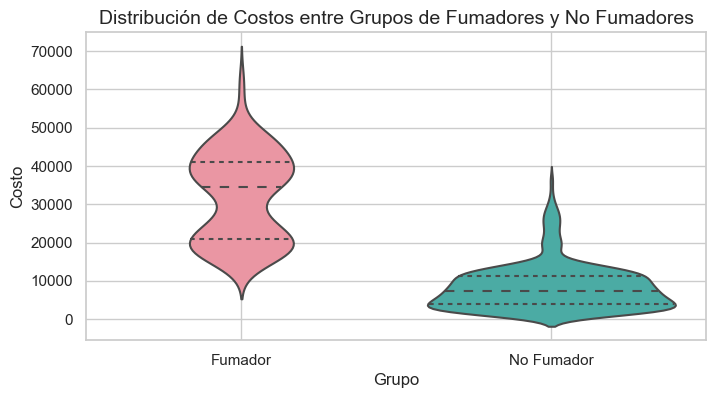

La media del grupo fumador es: 32050.23183153284
--------------------------------------------------
La media del grupo no fumador es: 8440.660306508937


In [46]:
grupo_fumador = df[df['fumador'] == 'yes']['costo']
grupo_no_fumador = df[df['fumador'] == 'no']['costo']

#----------------------------------------------------

sns.set(style="whitegrid")
sns.set_palette(['#B5837D'])

plt.figure(figsize=(8,4))
ax = sns.violinplot(data=[grupo_fumador, grupo_no_fumador], inner="quartile", linewidth=1.5)

plt.title('Distribución de Costos entre Grupos de Fumadores y No Fumadores', fontsize=14)
plt.ylabel('Costo', fontsize=12)
plt.xlabel('Grupo', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Fumador', 'No Fumador'])
plt.grid(True)
plt.show()

print('La media del grupo fumador es:', grupo_fumador.mean())
print('--------------------------------------------------')
print('La media del grupo no fumador es:', grupo_no_fumador.mean())

La **diferencia entre las medias** de los costos entre el grupo de fumadores ($32050.23) y el grupo de no fumadores ($8440.66) es bastante significativa. 

Esto sugiere que la condición de fumar parece tener un impacto sustancial en los costos médicos, ya que los fumadores tienden a tener costos mucho más altos en comparación con los no fumadores.

------------------------------------------------------------------

Además, realizaremos una **prueba t de Student**, que es una técnica estadística utilizada para determinar si hay una diferencia significativa entre las medias de dos grupos de datos. 

**HIPÓTESIS**:
- *Hipótesis nula (H0):* No hay diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores.

- *Hipótesis alternativa (H1):* Hay una diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores.


In [45]:
resultado_prueba_t = ttest_ind(grupo_fumador, grupo_no_fumador)

print("\nValor p de la prueba t de Student:", resultado_prueba_t.pvalue)

nivel_significancia = 0.05

if resultado_prueba_t.pvalue < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay una diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que hay una diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores.")


Valor p de la prueba t de Student: 1.4067220949376498e-282
Se rechaza la hipótesis nula. Hay una diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores.


> **CONCLUSIÓN**: 

Dado que el valor p obtenido de la prueba t de Student es extremadamente pequeño, mucho menor que el nivel de significancia típico (0.05), rechazamos la hipótesis nula. <br>
Por lo tanto, concluimos que hay una diferencia significativa en los costos médicos entre los grupos de fumadores y no fumadores, es decir, la condición de fumador tiene un impacto estadísticamente significativo en los costos médicos.

#### 6.2.3. Relación 'costo' y el 'imc' de los asegurados 

Realizaremos un gráfico de dispersión para visualizar la relación entre el costo y el Índice de Masa Corporal (IMC), si existe alguna tendencia o patrón en los puntos del gráfico. 

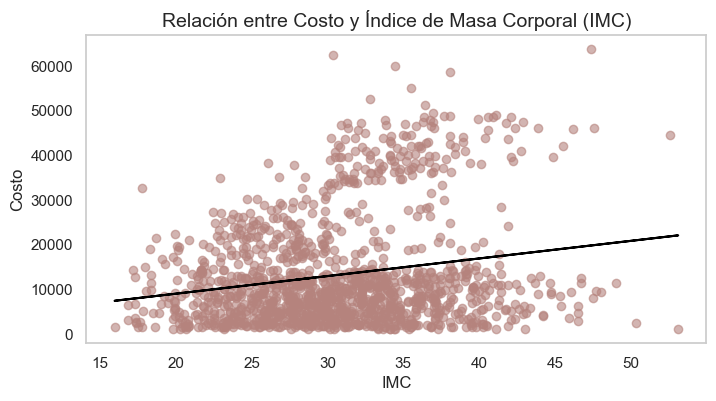

In [43]:
m, b = np.polyfit(df['imc'], df['costo'], 1)

# Crear el gráfico de dispersión
plt.figure(figsize=(8, 4))
plt.scatter(df['imc'], df['costo'], color='#B5837D', alpha=0.6)

# Agregar la línea de regresión
plt.plot(df['imc'], m * df['imc'] + b, color='black')

plt.title('Relación entre Costo y Índice de Masa Corporal (IMC)', fontsize=14)
plt.xlabel('IMC', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.grid(False)
plt.show()

Conforme puede observarse en la línea de regresión y la dispersión de los datos, hay una **relación significativa entre estas dos variables**, es decir, los costos podrían aumentar o disminuir a medida que el IMC aumenta.

----------

Igualmente, calcularemos el **Coeficiente de Correlación de Pearson**, para evaluar estadísticamente si hay relación lineal entre las dos variables.

**HIPÓTESIS:**
- *Hipótesis nula (H0):* No hay correlación entre el Índice de Masa Corporal (IMC) y el costo médico.
- *Hipótesis alternativa (H1):* Existe una correlación entre el Índice de Masa Corporal (IMC) y el costo médico.

In [48]:
correlacion, valor_p = pearsonr(df['imc'], df['costo'])

nivel_significancia = 0.05

print("\nCoeficiente de correlación de Pearson:", correlacion)
print("Valor p de la prueba de correlación de Pearson:", valor_p)

if valor_p < nivel_significancia:
    print("Se rechaza la hipótesis nula. Existe una correlación significativa entre el Índice de Masa Corporal (IMC) y el costo médico.")
else:
    print("No se puede rechazar la hipótesis nula. No hay suficiente evidencia para afirmar que existe una correlación significativa entre el Índice de Masa Corporal (IMC) y el costo médico.")



Coeficiente de correlación de Pearson: 0.19840083122624944
Valor p de la prueba de correlación de Pearson: 2.4680404264511973e-13
Se rechaza la hipótesis nula. Existe una correlación significativa entre el Índice de Masa Corporal (IMC) y el costo médico.


> **CONCLUSIÓN**: 

- **Coeficiente de correlación de Pearson**: <br>
El valor obtenido es aproximadamente 0.198, lo que indica una correlación positiva débil entre el costo y el IMC.  Esto sugiere que existe una tendencia general de que los costos aumenten ligeramente a medida que el IMC aumenta, pero la relación no es muy fuerte.

- **Valor p de la prueba de correlación de Pearson**: <br>
El valor p de la prueba de correlación de Pearson es extremadamente pequeño. Por lo tanto, al ser menor que el nivel de significancia predefinido (0.05), se rechaza la hipótesis nula y se concluye que hay una correlación significativa entre las variables.

Es decir, aunque la *correlación* entre el costo y el IMC es débil, el *valor p* extremadamente pequeño sugiere que esta correlación no es el resultado del azar.

#### 6.2.4. Relación 'costo' y 'region' en la que viven los beneficiarios

Realizaremos un gráfico para observar la dispersión de los puntos en cada región, lo que nos da una idea de la variabilidad de los costos médicos dentro de cada una.

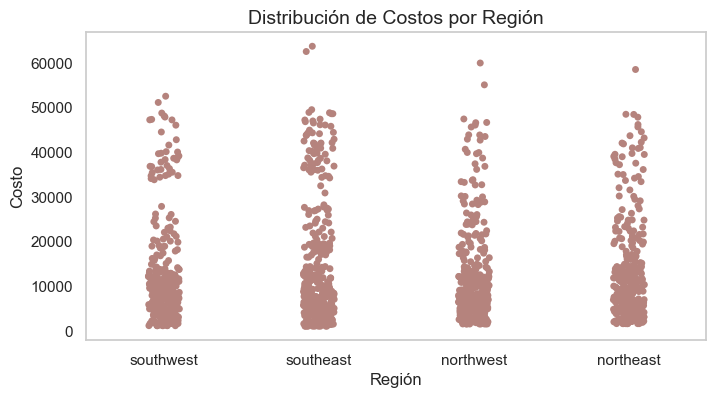

In [61]:
plt.figure(figsize=(8, 4))
sns.stripplot(x='region', y='costo', data=df, jitter=True, palette=['#B5837D', '#B5837D', '#B5837D', '#B5837D'])
plt.title('Distribución de Costos por Región', fontsize=14)
plt.xlabel('Región', fontsize=12)
plt.ylabel('Costo', fontsize=12)
plt.grid(False)
plt.show()

-------

Seguidamente haremos un **Análisis de Varianza (ANOVA)**, que es la prueba estadística adecuada para comparar los promedios de múltiples grupos.

**HIPÓTESIS:**

- *Hipótesis nula (H0):* No hay diferencia significativa en los costos médicos entre las regiones.
- *Hipótesis alternativa (H1):* Existe al menos una diferencia significativa en los costos médicos entre las regiones.

In [64]:
costos_por_region = [df[df['region'] == region]['costo'] for region in df['region'].unique()]

resultado_anova = f_oneway(*costos_por_region)

print("Valor p de la prueba ANOVA:", resultado_anova.pvalue)

nivel_significancia = 0.03

if resultado_anova.pvalue < nivel_significancia:
    print("Rechazamos la hipótesis nula (H0). Existe al menos una diferencia significativa en los costos médicos entre las regiones.")
else:
    print("No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que exista una diferencia significativa en los costos médicos entre las regiones.")


Valor p de la prueba ANOVA: 0.03276288025444947
No podemos rechazar la hipótesis nula (H0). No hay suficiente evidencia para afirmar que exista una diferencia significativa en los costos médicos entre las regiones.


Al establecer el **nivel de significancia en 0.03** en lugar de 0.05, estamos reduciendo la probabilidad de cometer un **error de tipo I**, es decir, rechazar incorrectamente la hipótesis nula cuando en realidad es verdadera.

Por lo tanto, al rechazar la hipótesis nula con un nivel de significancia más bajo, estamos siendo más conservadores en nuestras conclusiones y estamos buscando evidencia más sólida para afirmar que exista una diferencia significativa en los costos médicos entre las regiones.

> **CONCLUSIÓN**: 

Dado que el *valor p* está justo por encima del nivel de significancia típicamente utilizado de 0.05, **la evidencia en contra de la hipótesis nula no es extremadamente fuerte**.

Hay alguna diferencia en los costos entre las regiones, pero esta diferencia no es tan fuerte como para ser considerada altamente significativa.

#### 6.2.5. Relación 'costo' y 'sexo' de las personas

#### 6.2.6. Relación 'costo' e 'hijos' de los asegurados

## 7. TRANSFORMACIÓN COLUMNAS A NUMÉRICAS

Cuando trabajamos con algoritmos de Machine Learning, la mayoría de ellos están diseñados para operar con datos numéricos. 

Estos algoritmos utilizan operaciones matemáticas y estadísticas para aprender patrones y hacer predicciones. Por lo tanto, para que los algoritmos funcionen correctamente, es necesario representar todas las variables, incluidas las categóricas, en formato numérico.

La conversión de variables categóricas a numéricas permite que los algoritmos de Machine Learning procesen los datos de manera efectiva y realicen cálculos sobre ellos. 

Por lo tanto, transformar variables categóricas a numéricas, es fundamental para garantizar la compatibilidad con los algoritmos y permitir un procesamiento eficiente de los datos, lo que a su vez facilita la construcción y el análisis de modelos predictivos.

### 7.1. Columna 'smoker' - Mapeo de categorías 

In [15]:
mapeo_fumador = {'yes': 1, 'no': 0}

df['fumador'] = df['fumador'].map(mapeo_fumador)

### 7.2. Columna 'sexo' - Mapeo de categorías

Al ser una variable categórica, transformaremos la columna a numérica con valores binarios.

Por lo tanto, la nueva etiqueta de la columna será 'es_femenino', siendo el valor 1, es decir, positivo en caso que sea femenino, y 0, negativo, si el valor es 'masculino'.

In [16]:
df['es_femenino'] = df['sexo'].map({'female': 1, 'male': 0})

df.drop('sexo', axis=1, inplace=True)

### 7.3. Columna 'region' - LabelEnconder

In [17]:
label_encoder = LabelEncoder()
df['regiones'] = label_encoder.fit_transform(df['region'])

df.drop('region', axis=1, inplace=True)

### 7.4. Análisis correlación total variables numéricas

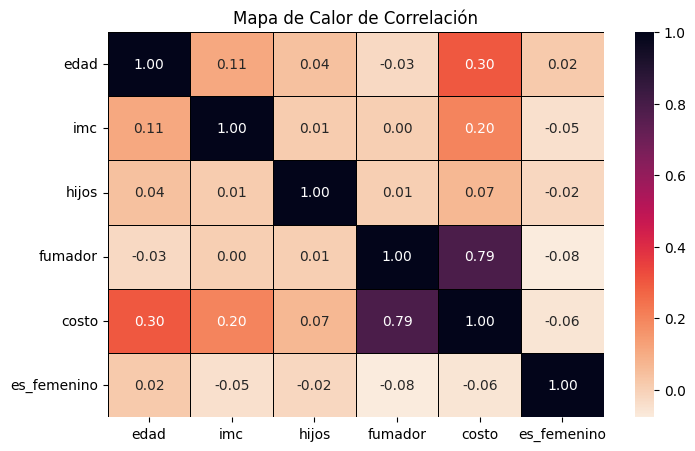

In [37]:
# Calcular la matriz de correlación
correlacion = df.corr()

# Establecer el tamaño de la figura
plt.figure(figsize=(8, 5))

# Crear el mapa de calor con el mapa de colores 'rocket_r'
sns.heatmap(correlacion, annot=True, cmap=sns.color_palette('rocket_r', as_cmap=True), fmt=".2f", linewidths=0.5, linecolor='black')

# Ajustes estéticos
plt.title('Mapa de Calor de Correlación')
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# Guardar el gráfico como imagen 
plt.savefig('../utils/heatmap_corr_total.png')

# Mostrar el gráfico
plt.show()



In [19]:
# Calcular la correlación de Pearson entre 'regiones' y 'costo'
correlation_coef, p_value = pearsonr(df['regiones'], df['costo'])

# Nivel de significancia (alpha)
alpha = 0.05

# Comprobar si la correlación es significativa
if p_value < alpha:
    print("La correlación entre 'regiones' y 'costo' es significativa (p-value < 0.05)")
else:
    print("La correlación entre 'regiones' y 'costo' no es significativa (p-value >= 0.05)")
    print("Por lo tanto, puede ser eliminada")

La correlación entre 'regiones' y 'costo' no es significativa (p-value >= 0.05)
Por lo tanto, puede ser eliminada


#### 7.4.1. Eliminación columna 'regiones'

Al observar la poca correlación entre la target y la variable 'regiones' decido eliminar dicha columna para evitar la colinealidad y disminuirle 'ruido' al modelo. 

In [20]:
df = df.drop(['regiones'], axis=1)

### 7.5. Guardo CSV con transformaciones numéricas

In [21]:
df.to_csv('../data/processed/df_numerico_para_F_E.csv')

## 8. DIVISIÓN DE DATOS 

In [4]:
df = pd.read_csv('../data/processed/df_numerico_para_F_E.csv', index_col=[0])

En primer lugar, hay que realizar la división de los datos entre las características, es decir, las variables independientes/features que sería **'X'**, y la target, que sería la variable dependiente, o sea, **'y'**. 

**'y'** es la variable objetivo, aquello que queremos predecir con los modelos de Regresión Lineal, dado que es una variable numérica continua. 

In [5]:
X = df.drop(columns='costo') 
y = df['costo']      

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Guardaré en una variable el conjunto de datos de prueba respecto a las features, para luego de hacer las predicciones, unirlas en un DataFrame y poder observar los resultados.

In [8]:
X_test_original = X_test.copy()

In [9]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (1069, 5)
y_train: (1069,)
X_test: (268, 5)
y_test: (268,)


## 9. FEATURE ENGINEERING

Seguidamente, según corresponda, realizaremos transformaciones logarítmicas y escalado de datos. 

- La ***transformación logarítmica*** se utiliza para tratar de hacer que la distribución de la variable sea más simétrica y se asemeje a una distribución normal. 

- El ***escalado*** se realiza para asegurar que todas las variables tengan un rango similar o estén en la misma escala, lo que puede ser importante para algunos algoritmos de machine learning que son sensibles a las diferencias en la escala de las variables.

### 9.1. Logaritmo a 'costo' y 'edad' 

Como hemos visto en el EDA, la variable 'edad' y 'costo' que es la target, no tienen una distirbución normal, y algunos modelos, pueden ser menos robustos cuando los datos no son normalmente distribuidos, lo que significa que son más sensibles a los valores atípicos o a la falta de normalidad en los datos.

Por lo que, le aplicaremos logaritmo a `'costo'` (que es la y) y la variable `'edad'` (en x)

In [10]:
# Logaritmo de la target 'costo'
y_train = np.log(y_train)
y_test = np.log(y_test) 

# Logaritmo de 'edad'
X_train['edad'] = np.log(X_train['edad']) 
X_test['edad'] = np.log(X_test['edad'])

### 9.2. Escalado a 'costo', 'edad', 'imc', 'hijos'

Por otro lado, le aplicamos una misma escala a ciertas variables mediante `StandardScaler`, el cual transforma los datos de manera que la media de cada característica sea cero y la desviación estándar sea uno. <br>
Lo que significa que todas las características estarán en la misma escala y tendrán la misma varianza, lo que facilita la comparación entre ellas y ayuda a los algoritmos a converger más rápido.

In [11]:
# Creamos un objeto StandardScaler para 'X'
scaler_X = StandardScaler()

# Definimos las columnas a escalar
columns_to_scale = ['edad', 'hijos', 'imc']

# Ajustamos y transformamos X_train
X_train[columns_to_scale] = scaler_X.fit_transform(X_train[columns_to_scale])

# Aplicamos la misma transformación a X_test
X_test[columns_to_scale] = scaler_X.transform(X_test[columns_to_scale])

In [12]:
# Creamos un objeto StandardScaler para 'y'
scaler_y = StandardScaler()

# Ajustamos y transformamos y_train
y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()

# Aplicamos la misma transformación a y_test
y_test = scaler_y.transform(y_test.values.reshape(-1, 1)).flatten()

## 10. BASE LINE Y CROSS VALIDATION

In [13]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

modelos = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(),
    "SVR": SVR(),
    "DecisionTreeRegressor": DecisionTreeRegressor(),
    "RandomForestRegressor": RandomForestRegressor(),
    "KNeighborsRegressor": KNeighborsRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor(),
    "XGBRegressor": XGBRegressor(),
    "LGBMRegressor": LGBMRegressor(silent=True, verbose=-1),
    "CatBoostRegressor": CatBoostRegressor(silent=True) 
}

scoring = {'R2': 'r2', 'RMSE': make_scorer(rmse, greater_is_better=False)}

resultados = {}

for nombre, modelo in modelos.items():
    scores = cross_validate(modelo, X_train, y_train, cv=3, scoring=scoring)
    
    mean_rmse = np.mean(-scores['test_RMSE'])

    resultados[nombre] = {
        'R2': np.mean(scores['test_R2']),
        'RMSE': mean_rmse
    }

In [14]:
df_resultados = pd.DataFrame(resultados).T 
df_resultados.sort_values(by='R2', ascending=False)

,R2,RMSE
GradientBoostingRegressor,0.803839,0.442633
SVR,0.803212,0.443247
LGBMRegressor,0.788792,0.459266
CatBoostRegressor,0.787071,0.461026
RandomForestRegressor,0.774757,0.473677
LinearRegression,0.744194,0.505479
Ridge,0.744162,0.505512
KNeighborsRegressor,0.735820,0.513513
XGBRegressor,0.728810,0.520397
DecisionTreeRegressor,0.585555,0.638053


En el DataFrame anterior, podemos ver en orden aquellos modelos que generalizan mejor: 
1. Gradient Boosting Regressor.
2. SVR - Support Vector Regression.
3. LGBM Regressor.
4. CatBoost Regressor.
5. RandomForest Regressor.

Cuando el coeficiente de determinación (R2) es alto, generalmente significa que el modelo es capaz de explicar una gran proporción de la variabilidad de los datos de respuesta utilizando las variables predictoras.

Es decir, en el contexto de un modelo de regresión, un alto indica que las predicciones del modelo se ajustan bien a los datos observados.

## 11. BÚSQUEDA DE HIPERPARÁMETROS CON GRIDSEARCH Y MEJOR MODELO

Seguidamente, realizaremos la búsqueda de los mejores hiperparámetros según cada modelo mediante `GridSearchCV`

### 11.1. SVR - Support Vector Regression

In [15]:
modelo_svr = SVR()

parametros = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.01, 0.001],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(modelo_svr, parametros, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

mejor_modelo_svr = grid_search.best_estimator_

with open('../models/mejor_modelo_svr.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_svr, f)

predicciones_train = mejor_modelo_svr.predict(X_train)
predicciones_test = mejor_modelo_svr.predict(X_test)

r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

Mejores hiperparámetros encontrados:
{'C': 10, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
Mejor puntuación de validación cruzada: 0.80608525637243
R^2 en datos de entrenamiento: 0.8204164648824043
R^2 en datos de prueba: 0.8764460374877766


In [18]:
with open('../models/mejor_modelo_svr.pkl', 'rb') as f:
    modelo_srv = pickle.load(f)

### 11.2. GradientBoosting Regressor


In [19]:
modelo_gradientboosting = GradientBoostingRegressor()

parametros = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(modelo_gradientboosting, parametros, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

mejor_modelo_gb = grid_search.best_estimator_

# Guardar el modelo
with open('../models/my_model.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_gb, f)

predicciones_train = mejor_modelo_gb.predict(X_train)
predicciones_test = mejor_modelo_gb.predict(X_test)

r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.8157985399188475
R^2 en datos de entrenamiento: 0.8471826180955637
R^2 en datos de prueba: 0.8815142546080172


In [20]:
# Cargar el modelo
with open('../models/my_model.pkl', 'rb') as f:
    my_model = pickle.load(f)

### 11.3. LGBM Regressor

In [21]:
modelo_lgbm = LGBMRegressor(silent=True, verbose=-1)

parametros = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(modelo_lgbm, parametros, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

mejor_modelo_lgbm = grid_search.best_estimator_

with open('../models/mejor_modelo_lgbm.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_lgbm, f)

predicciones_train = mejor_modelo_lgbm.predict(X_train)
predicciones_test = mejor_modelo_lgbm.predict(X_test)

r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.8171298166546593
R^2 en datos de entrenamiento: 0.84344971236798
R^2 en datos de prueba: 0.8805995795848303


In [22]:
with open('../models/mejor_modelo_lgbm.pkl', 'rb') as f:
    modelo_lgbm = pickle.load(f)

### 11.4. CatBoost Regressor

In [23]:
modelo_catboost = CatBoostRegressor(verbose=False)

parametros = {
    'learning_rate': [0.01, 0.1, 0.5],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(modelo_catboost, parametros, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

mejor_modelo_catboost = grid_search.best_estimator_

with open('../models/mejor_modelo_catboost.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_catboost, f)

predicciones_train = mejor_modelo_catboost.predict(X_train)
predicciones_test = mejor_modelo_catboost.predict(X_test)

r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

Mejores hiperparámetros encontrados:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.8168209423408697
R^2 en datos de entrenamiento: 0.8396955733015995
R^2 en datos de prueba: 0.8782040299406224


In [24]:
with open('../models/mejor_modelo_catboost.pkl', 'rb') as f:
    modelo_catboost = pickle.load(f)

### 11.5. RandomForest Regressor

In [25]:
modelo_randomforest = RandomForestRegressor()

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 7]
}

grid_search = GridSearchCV(modelo_randomforest, parametros, cv=3, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor puntuación de validación cruzada:", grid_search.best_score_)

mejor_modelo_rf = grid_search.best_estimator_

with open('../models/mejor_modelo_rf.pkl', 'wb') as f:
    pickle.dump(mejor_modelo_rf, f)

predicciones_train = mejor_modelo_rf.predict(X_train)
predicciones_test = mejor_modelo_rf.predict(X_test)

r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

Mejores hiperparámetros encontrados:
{'max_depth': 5, 'n_estimators': 50}
Mejor puntuación de validación cruzada: 0.8053518472877363
R^2 en datos de entrenamiento: 0.8440823311237966
R^2 en datos de prueba: 0.8766864318258601


In [26]:
with open('../models/mejor_modelo_rf.pkl', 'rb') as f:
    modelo_rf = pickle.load(f)

### 11.6. RESULTADO MEJOR MODELO 

Si analizamos los distintos resultados obtenidos por cada modelo con GridSearch, podemos ver que el modelo que mejor generaliza respecto a los nuevos datos es: **GradientBoosting Regressor**


## 12. ENTRENAMIENTO MODELO Y PREDICCIONES

En conclusión, habiendo observado que el modelo que mejor generaliza los nuevos datos es `GradientBoosting Regressor()`, realizaremos el entrenamiento del modelo y las predicciones. 

In [27]:
my_model = GradientBoostingRegressor(learning_rate=0.1,
                                     max_depth=3, 
                                     n_estimators=50)

# Entrenmiento
my_model.fit(X_train, y_train)

# Predicciones en datos de entrenamiento y prueba
predicciones_train = my_model.predict(X_train)
predicciones_test = my_model.predict(X_test)

# R^2 en datos de entrenamiento y prueba
r2_train = r2_score(y_train, predicciones_train)
r2_test = r2_score(y_test, predicciones_test)

print('R^2 en datos de entrenamiento:', r2_train)
print('R^2 en datos de prueba:', r2_test)

R^2 en datos de entrenamiento: 0.8471826180955637
R^2 en datos de prueba: 0.8815142546080172


### 12.1. CONCLUSIONES

El modelo que hemos entrenado muestra un buen rendimiento tanto en los datos de entrenamiento como en los de prueba. 

Para los ***datos de entrenamiento***, el coeficiente de determinación (R^2) es del **84.7%**, lo que indica que el modelo explica aproximadamente el 84.7% de la variabilidad en los datos. 

En cuanto a los ***datos de prueba***, el R^2 es del **88.2%**, lo que sugiere que el modelo generaliza bien para nuevos datos, mostrando un buen poder predictivo en general."

### 12.2. REVERSIÓN DE TRANSFORMACIONES

In [28]:
y_test_inverso = np.exp(scaler_y.inverse_transform(predicciones_test.reshape(-1, 1)))

### 12.3. RESULTADOS PREDICCIONES CON LOS DATOS 

In [29]:
predicciones_df = pd.DataFrame(y_test_inverso, columns=['Predicciones'], index=X_test_original.index)

datos_prueba_con_predicciones = pd.concat([X_test_original, predicciones_df], axis=1)

In [30]:
datos_prueba_con_predicciones

,edad,imc,hijos,fumador,es_femenino,Predicciones
900,49,22.515,0,0,0,9681.312521
1064,29,25.600,4,0,1,7243.519269
1256,51,36.385,3,0,1,11579.925322
298,31,34.390,3,1,0,38101.210023
237,31,38.390,2,0,0,5651.622852
...,...,...,...,...,...,...
534,64,40.480,0,0,0,13793.204759
542,63,36.300,0,0,1,13914.866987
760,22,34.580,2,0,1,4752.955249
1284,61,36.300,1,1,0,48025.198725
